In [46]:
#define library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
# added / reading dataset
heart_disease = pd.read_csv("C:/Users/avcil/projects/data science projects/datasets/Heart_Disease.csv")  

14 attributes used:

Complete attribute documentation:

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type

 -- Value 1: typical angina

 -- Value 2: atypical angina

 -- Value 3: non-anginal pain

 -- Value 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl


fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

restecg: resting electrocardiographic results

 -- Value 0: normal

 -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

 -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     
thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

 -- Value 1: upsloping

 -- Value 2: flat

 -- Value 3: downsloping
     
ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

num: diagnosis of heart disease (angiographic disease status)

 -- Value 0: < 50% diameter narrowing       Absence

 -- Value 1: > 50% diameter narrowing       Presence

In [48]:
# copy dataset to perform operations on it
df = heart_disease.copy()

In [49]:
# show title and data
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [50]:
# observe the size
df.shape

(270, 14)

In [51]:
# showing some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [52]:
# observation the number of heart disease patients
df.groupby('Heart Disease').size()

Heart Disease
Absence     150
Presence    120
dtype: int64

In [53]:
# observation the number of sex
df.groupby('Sex').size()
#  0 shows female and 1 shows male

Sex
0     87
1    183
dtype: int64

In [54]:
# separate Presence - Absence
presence = df[(df["Heart Disease"] == "Presence")]
presence

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,64,1,3,140,335,0,0,158,0,0.0,1,0,3,Presence
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,Presence
262,58,1,2,120,284,0,2,160,0,1.8,2,0,3,Presence
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,Presence


In [55]:
# separate Presence - Absence
absence = df[(df["Heart Disease"] == "Absence")]
absence

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
10,59,1,4,135,234,0,0,161,0,0.5,2,0,7,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,Absence
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence


In [56]:
# observation the statistics of numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [57]:
#observation statictics ( other way)
print("Mean age of all:", df.Age.mean())
print("Mean age of patients with presence:", presence.Age.mean())
print("Mean age of patients with absence:", absence.Age.mean())
print("*****************************************************************************")
print("Variance age of patients with presence:", presence.Age.var())
print("Variance age of patients with absence:", absence.Age.var())
print("*****************************************************************************")
print("Standard Deviation age of patients with presence:", presence.Age.std())
print("Standard Deviation age of patients with absence:", absence.Age.std())
print("*****************************************************************************")
print("Median age of patients with presence:", presence.Age.median())
print("Median age of patients with absence:", absence.Age.median())
print("*****************************************************************************")

Mean age of all: 54.43333333333333
Mean age of patients with presence: 56.59166666666667
Mean age of patients with absence: 52.70666666666666
*****************************************************************************
Variance age of patients with presence: 65.87387955182072
Variance age of patients with absence: 90.4368680089486
*****************************************************************************
Standard Deviation age of patients with presence: 8.116272515867164
Standard Deviation age of patients with absence: 9.509830072559057
*****************************************************************************
Median age of patients with presence: 58.0
Median age of patients with absence: 52.0
*****************************************************************************


In [58]:
# checking missing value
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [59]:
# checking dublicated value
df.duplicated().sum()

0

# Visualization #

Text(0.5, 1.0, 'Missing null values')

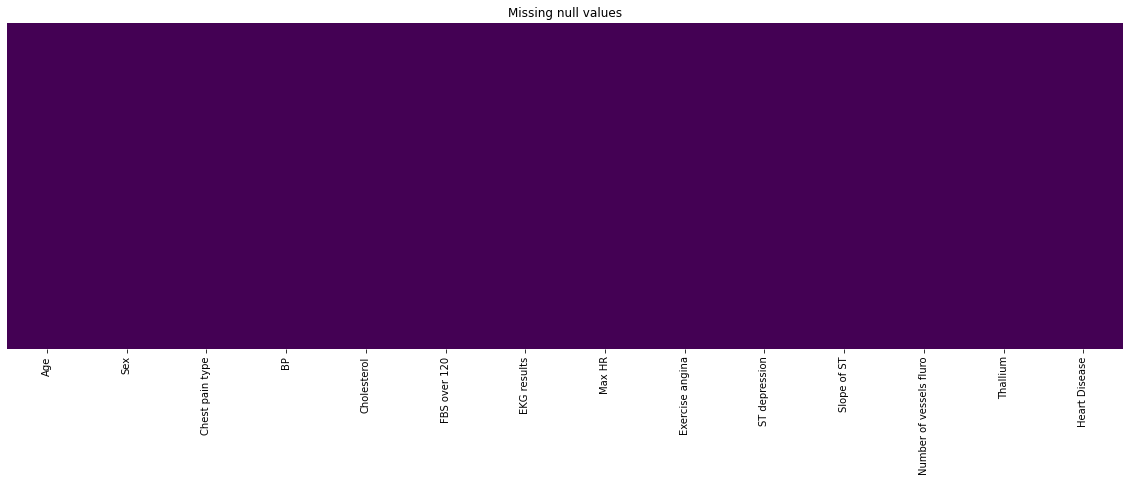

In [60]:
# Missing values visualization (but we do not have so can we nothing)
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

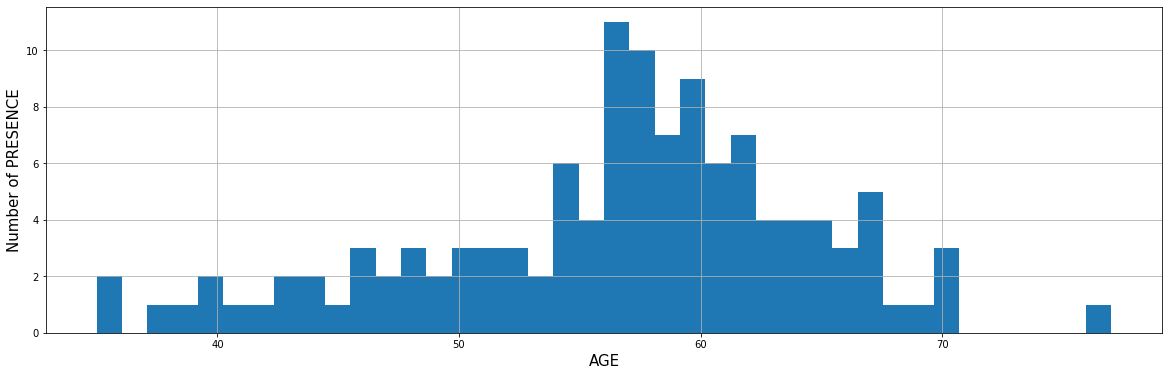

In [61]:
# Visualization of data distributions

presence_age = presence["Age"]
presence_age.hist(histtype="bar", bins=40)

plt.xlabel("AGE", fontsize=15)
plt.ylabel("Number of PRESENCE", fontsize=15)
plt.show()

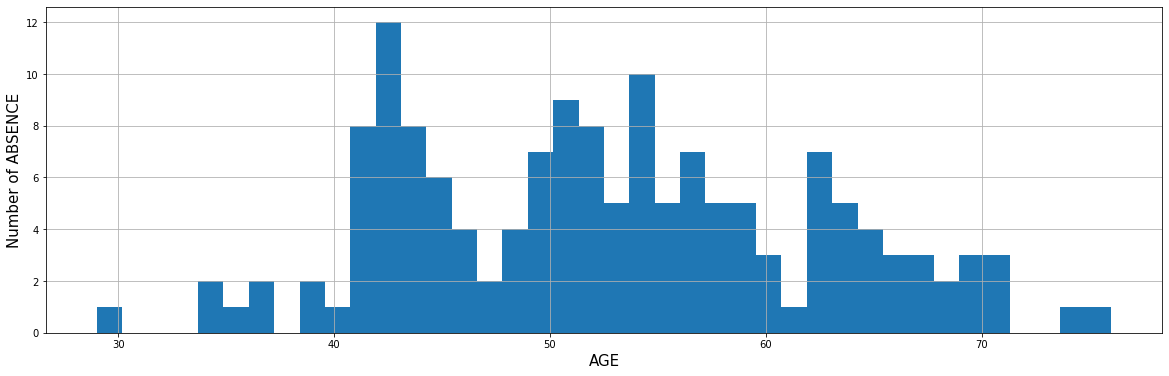

In [62]:
# Visualization of data distributions

absence_age = absence["Age"]
absence_age.hist(histtype="bar", bins=40)

plt.xlabel("AGE", fontsize=15)
plt.ylabel("Number of ABSENCE", fontsize=15)
plt.show()

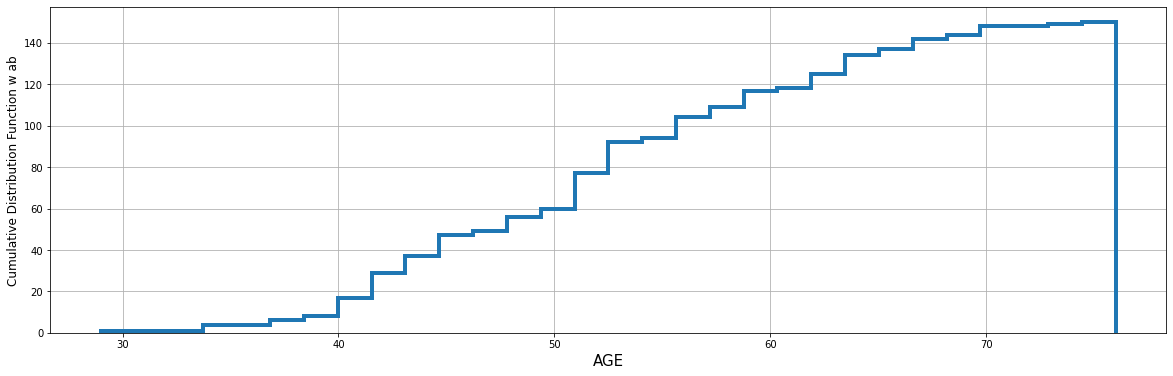

In [63]:
# Visualization of data distributions
# Cumulative Distribution Function

absence_age.hist(histtype="step", cumulative=True, linewidth=4, bins=30)

plt.xlabel("AGE", fontsize=15)
plt.ylabel("Cumulative Distribution Function w ab", fontsize=12)
plt.show()

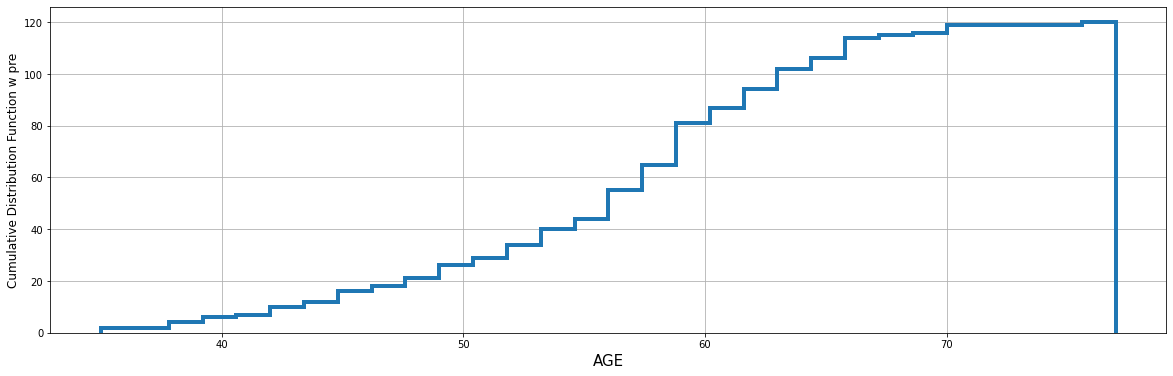

In [64]:
# Visualization of data distributions
# Cumulative Distribution Function

presence_age.hist(histtype="step", cumulative=True, linewidth=4, bins=30)

plt.xlabel("AGE", fontsize=15)
plt.ylabel("Cumulative Distribution Function w pre", fontsize=12)
plt.show()

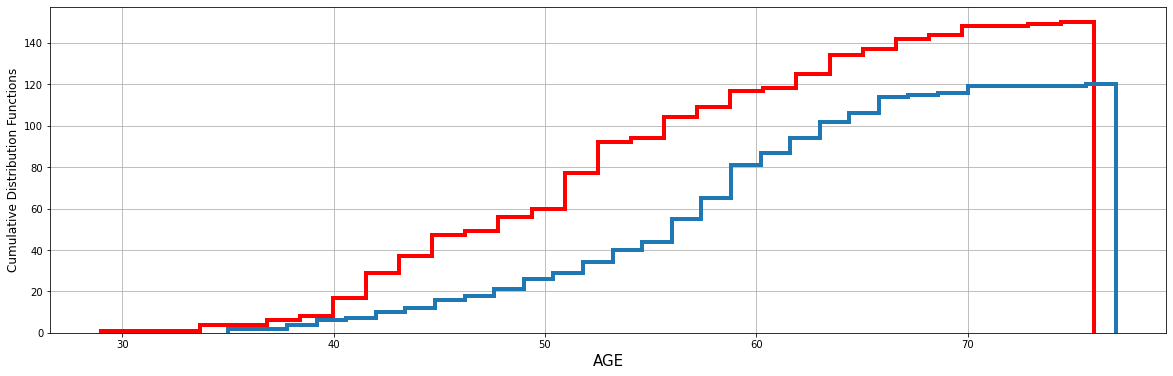

In [65]:
# Visualization of data distributions
# integrated Cumulative Distribution Function

absence_age.hist(histtype="step", cumulative=True, linewidth=4, bins=30, color="red")
presence_age.hist(histtype="step", cumulative=True, linewidth=4, bins=30)


plt.xlabel("AGE", fontsize=15)
plt.ylabel("Cumulative Distribution Functions", fontsize=12)
plt.show()